In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Preprocessing**

In [2]:
df = pd.read_csv("mushrooms.csv")
pd.options.display.max_columns = None
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

* There are a total of 8124 data.
* There are only Categorical features and we need to convert to numeric for further preprocessing.

In [5]:
df.isna().sum()  # THere aare NO null values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All data types are of object type so we will label encode it to covert it to integer type.

In [7]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

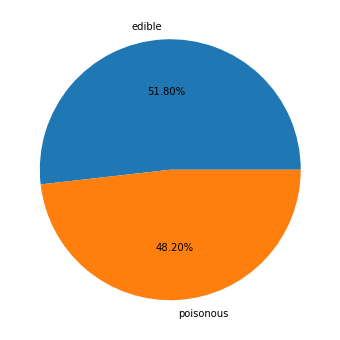

In [8]:
plt.figure(figsize=(6,6))
mushrooms = ['edible', 'poisonous']
count = [len(df[df['class']=='e']), len(df[df['class']=='p'])]
colors = sns.color_palette()
plt.pie(count, labels=mushrooms, colors = colors, autopct= '%1.2f%%')
plt.show()

Here, number of edible mushrooms(51.80%) & no: of poisonous mushrooms(48.20%)

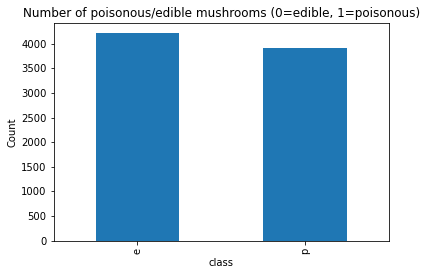

In [9]:
plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)')
plt.show()

**The dataset is balanced**

In [10]:
# Lets do Label Encoding to convert catagorical to ordinal
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
class,8124.0,0.482029,0.499708,0.0,0.0,0.0,1.0,1.0
cap-shape,8124.0,3.348104,1.604329,0.0,2.0,3.0,5.0,5.0
cap-surface,8124.0,1.827671,1.229873,0.0,0.0,2.0,3.0,3.0
cap-color,8124.0,4.504677,2.545821,0.0,3.0,4.0,8.0,9.0
bruises,8124.0,0.415559,0.492848,0.0,0.0,0.0,1.0,1.0
odor,8124.0,4.144756,2.103729,0.0,2.0,5.0,5.0,8.0
gill-attachment,8124.0,0.974151,0.158695,0.0,1.0,1.0,1.0,1.0
gill-spacing,8124.0,0.161497,0.368011,0.0,0.0,0.0,0.0,1.0
gill-size,8124.0,0.309207,0.462195,0.0,0.0,0.0,1.0,1.0
gill-color,8124.0,4.810684,3.540359,0.0,2.0,5.0,7.0,11.0


From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data so we can drop it.

In [12]:
df=df.drop(["veil-type"],axis=1)

<AxesSubplot:>

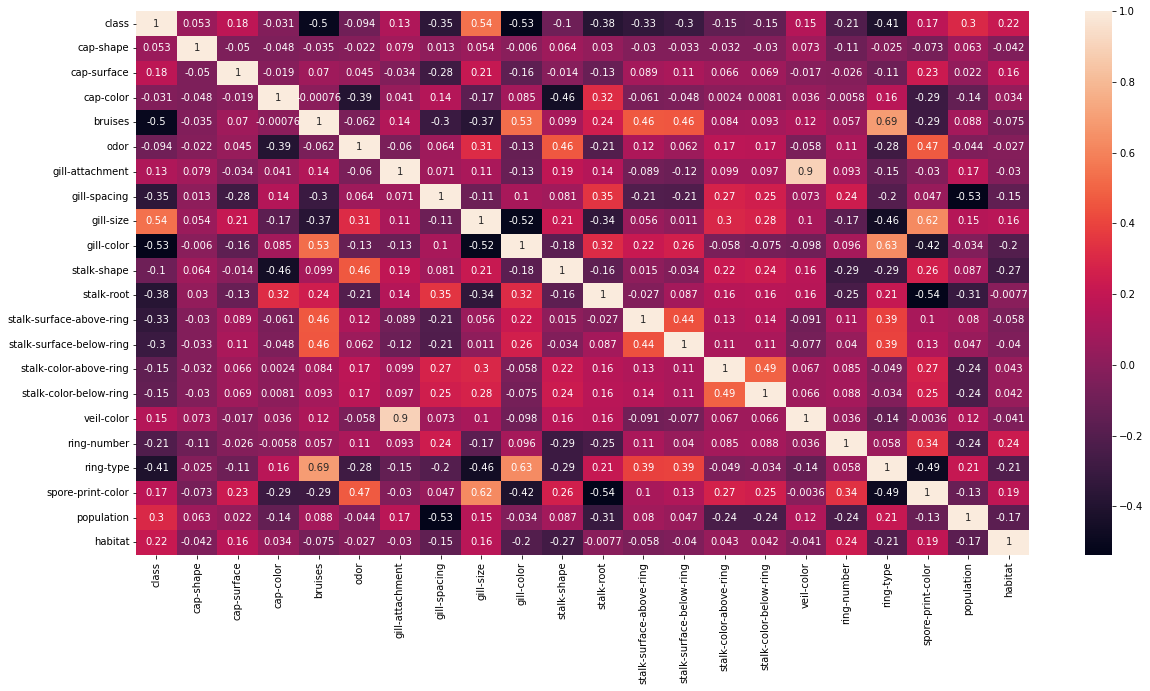

In [13]:
#Let's look at the correlation between the variables
cr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cr, annot = True)

In [14]:
#Split Data in Train and Test Set
x = df.drop('class', axis=1)
y = df['class']

In [15]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

**Model Selection**

In [19]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
print('The accuracy score for KNN is :', acc_knn)

The accuracy score for KNN is : 99.63


In [20]:
# SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
print('The accuracy score for SVM is :', acc_svc)

The accuracy score for SVM is : 99.38


In [21]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier as GBC
gbc = GBC()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
acc_gbc = round(gbc.score(x_test, y_test) * 100, 2)
print('The accuracy score for Gradient Boost is :', acc_gbc)

The accuracy score for Gradient Boost is : 100.0


In [25]:
#Applying Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB as GNB
gnb = GNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
acc_gnb = round(gnb.score(x_test, y_test) * 100, 2)
print('The accuracy score for Naive Bayes is :', acc_gnb)

The accuracy score for Naive Bayes is : 92.18


In [27]:
model = pd.DataFrame({'Model' : [ 'Gradient Boosting Classifier', 'KNN', 'Support Vector Machine', 'Gaussian Naive Bayes'],
                     'Score' : [acc_gbc, acc_knn, acc_svc,  acc_gnb]})
model.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Gradient Boosting Classifier,100.00
1,KNN,99.63
2,Support Vector Machine,99.38
3,Gaussian Naive Bayes,92.18


The score table says that Gradient Boosting Classifier works the best